# **Лабораторна робота №5**
### з дисципліни **"Інтелектуальний аналіз даних"**

##### **За темою:** "Побудова та оцінювання ансамблiв моделей класифiкацiї та регресії з використанням бібліотеки Scikit-Learn Python"

##### **Варіант:** 24

##### **Виконав:** Гавлицький Іван, КА-12

##### **Перевірила:** Недашкiвська Н.I.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### **Хід виконання роботи:**
1. Початковi 2D-данi представити графiчно.
2. Розбити данi на навчальний, перевiрочний та тестовий набори. Перевiрочний набiр використати для налаштування гiперпараметрiв. Тестовий набiр використати для остаточної оцiнки якостi моделей.
3. Побудувати ансамблi моделей, використовуючи ***AdaBoostClassifier***. Розглянути рiзнi значення *n_estimators*, *learning_rate* та *algorithm*.
    * В якостi *base_estimator* / *estimators* використати одну/ кiлька моделей iз параметрами по умовчанню: дерев рiшень, логiстичної регресiї, *svm* тощо.
    * Побудувати графiки залежностi значень показника якостi ансамбля та iндивiдуальної моделi вiд *n_estimators* на однiй координатнiй вiсi. Такий графiк для iндивiдуальної моделi, очевидно, буде горизонтальною прямою.<br>В задачах класифiкацiї в якостi показника якостi можна обрати accuracy_score, f1_score або *zero_one_loss*. В задачах регресiї показником якостi можна обрати $R^2$, *MAPE* або *RMSE*.
4. В задачах класифiкацiї навести приклад границi рiшень *decision boundaries* на основi окремої моделi та ансамблю.
5. Розрахувати значення змiщення та дисперсiї для окремої моделi та ансамблю.
6. Що можна сказати про час навчання ансамблю порiвняно з окремими моделями, якi утворюють цi ансамблi?
7. Зробити висновки. Чи краще на заданих даних виконується ансамбль порiвняно з iндивiдуальними моделями?

### ***AdaBoost***

В методі ***AdaBoost*** новий прогнозатор виправляє свого попередника у наступний спосіб: трохи більше уваги приділяється навчальним прикладам, на яких у попередника було недонавчання. Так, при побудові класифікатора метод ***AdaBoost*** спочатку навчає перший базовий класифікатор (нехай це буде дерево рішень, який використовується для побудови прогнозів на навчальному наборі. Шукаються некоректно класифіковані ним навчальні приклади і їх відносна вага збільшується. Другий класифікатор навчається вже із застосуванням оновлених ваг, після чого він використовується для вироблення прогнозів на навчальному наборі, ваги знову оновлюються і т.д. Після того як всі прогнозатори навчені, ансамбль виробляє прогнози аналогічно до того як це роблять беггінг або вставка за винятком того, що прогнозатори мають різні ваги в залежності від їх загальної правильності на зваженому навчальному наборі.

У ***AdaBoost*** – методі послідовного навчання є один важливий недолік: він не допускає розпаралелювання (або тільки частково допускає), оскільки кожен прогнозатор можна навчати лише після того, як був навчений і оцінений попередній прогнозатор. В результаті ***AdaBoost*** не масштабується настільки добре, як беггінг або вставка.

Докладніше розглянемо алгоритм.
Вага кожного навчального прикладу $w^{(i)}$ спочатку встановлюється рівною $\frac{1}{m}$. Виконується навчання першого прогнозатора і підраховується його **зважена частота помилок** $r_1$ на навчальному наборі за наступною формулою:

$$r_j = \frac{\sum_{i=1, \hat y_{j}^{(i)}\neq y^{(i)}}^m w^{(i)}}{\sum_{i=1}^{m} w^{(i)}}$$

де:
* $r_j$ – зважена частота помилок $j$–го прогнозатора, 
* $\hat y_{j}^{(i)}$ - прогноз $j$–го прогнозатора для $i$-го прикладу.

Потім обчислюється $a_j$ − **вага прогнозатора**:

$$a_j = \eta \ln \frac{1 - r_j}{r_j}$$

де $\eta$ – гіперпараметр швидкості навчання, стандартне його значення= 1. Чим більш правильним є прогнозатор, тим вищою буде його вага. Якщо прогнозатор всього лише випадково вгадує, тоді його вага буде близькою до нуля. Однак якщо прогнозатор майже завжди помиляється, тобто його правильність нижча за випадкове вгадування, то його вага буде від’ємною.

**Ваги прикладів оновлюються:**

$$w^{i} = 
\begin{cases}
    w^{i},\ \hat y_{j}^{(i)} = y^{(i)}\\
    w^{i} \exp(a_j),\ \hat y_{j}^{(i)}\neq y^{(i)}
\end{cases}\
i = 1, ..., m$$

В результаті ваги некоректно класифікованих прикладів зростають.

Після цього ваги прикладів нормуються. На наступному етапі новий прогнозатор навчається з використанням оновлених ваг, після чого весь процес повторюється: знову обчислюється вага нового прогнозатора, оновлюються ваги прикладів, виконується навчання ще одного прогнозатора і т.д.). Алгоритм зупиняється, коли досягнута бажана кількість прогнозаторів або знайдено досконалий прогнозатор.

Етап прогнозування в алгоритмі AdaBoost полягає у підрахунку прогнозів за всіма прогнозаторами, і виконується їх зважування із застосуванням ваг прогнозаторів $a_j$. Спрогнозованим класом буде той, який отримує більшість зважених голосів:

$$\hat y(x) = {argmax}_k \sum_{j=1, \hat y_j(x)=k}^N a_j$$
$N$ – кількість прогнозаторів.

***Scikit-Learn*** використовує багатокласову версію алгоритму ***AdaBoost***, яка називається ***SAMME*** (*Stagewise Additive Modeling using а Multiclass Exponential loss function* – поетапне, ступінчасте адитивне моделювання із застосуванням багатокласової експоненційної функції втрат). Для випадку
двох класів алгоритм ***SАММЕ*** еквівалентний до ***AdaBoost***.

Якщо прогнозатори здатні оцінювати ймовірності класів, тобто мають метод *predict_proba()*, ***Scikit-Learn*** може використовувати модифікований алгоритм ***SAMME.R*** (*R* означає *Real*), який в якості прогнозів використовує ймовірності класів, і в цілому виконується краще.

##### **Набір даних:**

In [2]:
from sklearn.datasets import fetch_covtype

X, y_true = fetch_covtype(
    return_X_y=True
)

Оскільки початкові дані описуються сьома ознаками, що забагато для візуалізації, застосуємо метод ***PCA*** *(Principal component analysis)* для зниження розмірності.

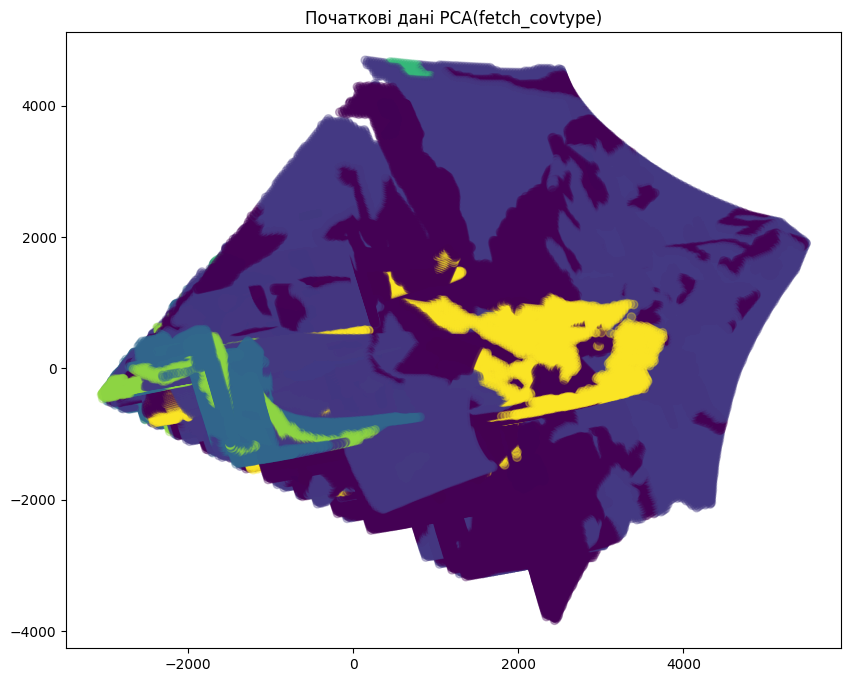

In [3]:
from sklearn.decomposition import PCA

pca = PCA(
    n_components=2,
    random_state=42
)

X_2d = pca.fit_transform(X)


fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Початкові дані PCA(fetch_covtype)')
ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y_true, alpha=0.3)
fig.show()

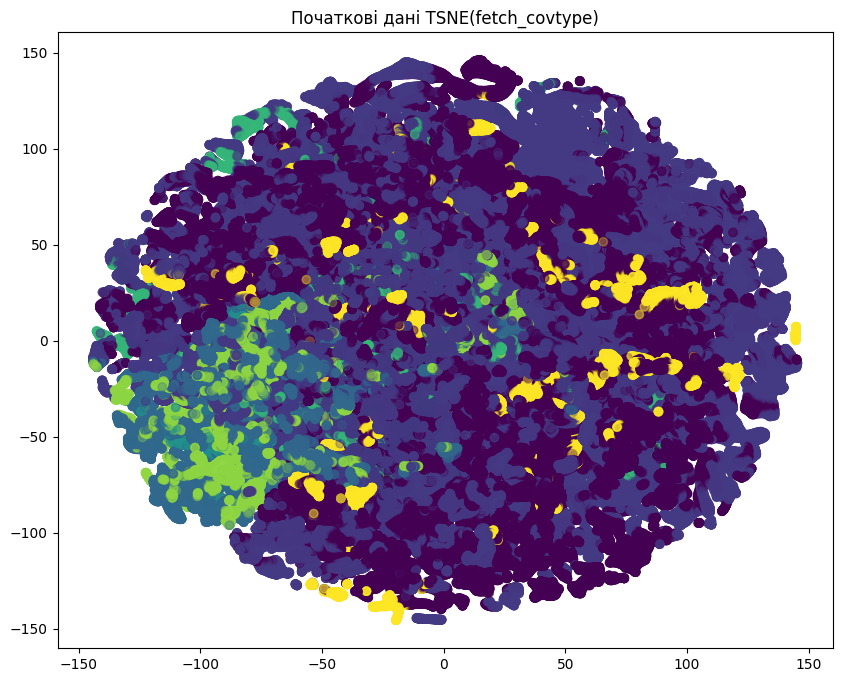

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne_res = tsne.fit_transform(X)


fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Початкові дані TSNE(fetch_covtype)')
ax.scatter(tsne_res[:, 0], tsne_res[:, 1], c=y_true, alpha=0.3)
fig.show()

Розділимо вибірку на навчальну та валідаційну.

In [5]:
subset_size = 10000

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_true,
    test_size=int(0.3 * subset_size),
    train_size=int(0.7 * subset_size),
    stratify=y_true,
    shuffle=True,
    random_state=42
)

Побудуємо ансамбль моделей, використавши ***AdaBoostClassifier.*** В якості базової моделі використаємо *Decision Tree Classifier,  Support Vector Classification та Logistic Regression Сlassifier*.

In [7]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [8]:
from sklearn.metrics import accuracy_score

estimators_titles = [
    'DecisionTreeClassifier',
    'LogisticRegressionСlassifier'
]

base_estimators = [
    DecisionTreeClassifier(max_depth=1),
    LogisticRegression(max_iter=10**6, n_jobs=-1),
]

for ii, base_estimator in enumerate(base_estimators):
    ensemble = AdaBoostClassifier(
        estimator=base_estimator,
        algorithm='SAMME',
        learning_rate=1,
        random_state=42
    )
    
    ensemble.fit(X_train, y_train)

    print(f'AdaBoost {estimators_titles[ii]} accuracy:')
    
    y_train_pred = ensemble.predict(X_train)
    print(f'Train set: {accuracy_score(y_train, y_train_pred)}')

    y_test_pred = ensemble.predict(X_test)
    print(f'Test set: {accuracy_score(y_test, y_test_pred)}')
    
    print('\n'*3)
    

AdaBoost DecisionTreeClassifier accuracy:
Train set: 0.6407142857142857
Test set: 0.6376666666666667




AdaBoost LogisticRegressionСlassifier accuracy:
Train set: 0.6735714285714286
Test set: 0.6696666666666666






Далі будемо я кості базових моделей розглядати однорівневі дерева рішень (пеньки), на їх тренування просто витрачається меньше часу.

In [9]:
ensemble = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    learning_rate=1,
    random_state=42
)

Виконаємо решітчастий пошук для підбору гіперпараметрів.

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1)],
    'n_estimators': [25, 30, 50],
    'learning_rate': [0.5, 0.75, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(
    ensemble, param_grid,
    cv=10,
    refit=True,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train);

Одержали найкращі гіперпараметри:

In [11]:
print(f'Найкраща точність: {grid_search.best_score_}')
print(f'За наступних гіперпараметрів: {grid_search.best_params_}')

Найкраща точність: 0.6764285714285714
За наступних гіперпараметрів: {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.5, 'n_estimators': 50}


Побудуємо графiк залежностi *accuracy_score* вiд *n_estimators* в ансамблі.

In [12]:
from sklearn.model_selection import cross_validate

def learning_curve_estimators_number(X, y_true, estimators_numbers, cv=10):
    train_scores = []
    test_scores = []
    
    for nn in estimators_numbers:
#         print(f'Number of estimators: {nn}')
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=nn,
#             algorithm='SAMME',
            learning_rate=0.5,
            random_state=42
        )
        
        cv_results = cross_validate(
            model, X, y_true,
            scoring='accuracy',
            cv=cv,
            return_train_score=True
        )

        train_scores.append(cv_results['train_score'])
        test_scores.append(cv_results['test_score'])
        
    return estimators_numbers, np.array(train_scores), np.array(test_scores)

    

In [13]:
def learning_curve_estimators_number_plot(X, y_true, estimators_numbers):
    train_sizes, train_scores, test_scores = learning_curve_estimators_number(
        X, y_true, 
        estimators_numbers=estimators_numbers,
        cv=10
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))

    ax.set_title('Learning curve')
    ax.set_xlabel('Estimators number')
    ax.set_ylabel('Score')

    ax.plot(train_sizes, train_scores_mean, 'o-', label='Train score')
    ax.fill_between(train_sizes,
                    train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std,
                    alpha=0.1)

    ax.plot(train_sizes, test_scores_mean, 'o-', label='Test score')
    ax.fill_between(train_sizes,
                    test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std,
                    alpha=0.1)
    

    ax.legend()
    fig.show()

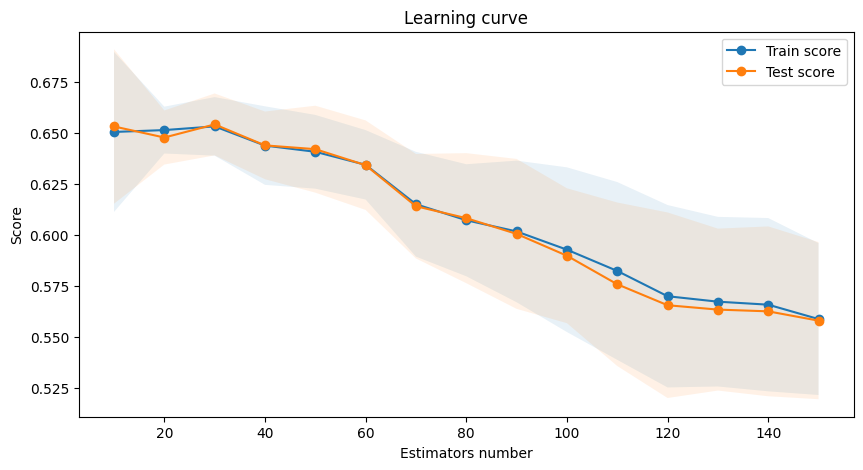

In [14]:
learning_curve_estimators_number_plot(
    X_train, y_train,
    estimators_numbers = np.arange(10, 151, 10)
)

Перевіримо точність окремої моделі DecisionTreeClassifier на довільних параметрах.

In [15]:
model = DecisionTreeClassifier(max_depth = 15,
                               max_features = 'sqrt',
                               max_leaf_nodes = 20,
                               min_samples_leaf = 5,
                               min_samples_split = 20)

model.fit(X_train, y_train);

In [16]:
y_train_pred = model.predict(X_train)
print(f'Train set: {accuracy_score(y_train, y_train_pred)}')

y_test_pred = model.predict(X_test)
print(f'Test set: {accuracy_score(y_test, y_test_pred)}')

Train set: 0.6871428571428572
Test set: 0.683


Порівняємо відхилення та дисперсію окремої моделі DecisionTreeClassifier та ансамблю:

In [17]:
from mlxtend.evaluate import bias_variance_decomp

_, bias, variance = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='0-1_loss', num_rounds=50, random_seed=42)
print("Дерево рішень: ")
print(f'{bias:.2f}(bias) --- {variance:.2f}(variance) \n')

_, bias, variance = bias_variance_decomp(grid_search.best_estimator_, X_train, y_train, X_test, y_test, loss='0-1_loss', num_rounds=50, random_seed=42)
print("Ансамбль:")
print(f'{bias:.2f}(bias) --- {variance:.2f}(variance) \n')

Дерево рішень: 
0.31(bias) --- 0.14(variance) 

Ансамбль:
0.32(bias) --- 0.03(variance) 



Експериментально було підтверджено, що час навчання ансамблю більше в n разів за чаас навчання моделі-бази, де n - кількість моделей.

Така ситуація пояснюється відсутністю можливості паралельного навчання кількох моделей в бустингу.

##### **Висновки:**

Через малу кількість екземплярів (обчислювальні можливості) та дуже складні дані (багатовимірні екземпляри), ансамбль відпрацював навіть гірше за окрему модель. Були спроби покращити  результат шляхом зміни гіпер-параметрів, за якими не послідували покращення точності.